In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestClassifier, RandomForestRegressor
import warnings
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [2]:
warnings.simplefilter('ignore')


In [3]:
df = pd.read_csv('thyroid_cancer_risk_data.csv')
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [4]:
ohe_encoding = OneHotEncoder(drop="first", sparse_output=False)
encoded_cols = ["Gender", "Country", "Ethnicity"]
df_ohe_encoding = pd.DataFrame(ohe_encoding.fit_transform(df[encoded_cols]), columns=ohe_encoding.get_feature_names_out(encoded_cols))

In [5]:
ord_encoding = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['Thyroid_Cancer_Risk'] = ord_encoding.fit_transform(df[['Thyroid_Cancer_Risk']])

df = df.drop(columns=encoded_cols).join(df_ohe_encoding)

df['Diagnosis'] = df['Diagnosis'].map({'Benign' : 0, 'Malignant' : 1})

In [6]:
binary_cols = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes']
df[binary_cols] = df[binary_cols].replace({'Yes' : 1, 'No' : 0}).astype(int)

In [7]:
df

,Patient_ID,Age,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,...,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,1,66,0,1,0,0,0,0,9.37,1.67,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,29,0,1,0,0,0,0,1.83,1.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,86,0,0,0,0,0,0,6.26,2.59,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,75,0,0,0,0,0,0,4.10,2.62,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,35,1,1,0,0,0,0,9.10,2.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,0,0,0,0,1,0,2.00,0.64,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
212687,212688,89,0,0,0,0,1,0,9.77,3.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212688,212689,72,0,0,0,0,0,1,7.72,2.44,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
212689,212690,85,0,0,0,0,0,1,5.62,2.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train test & split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_resultats = pd.DataFrame()


X = df.drop(columns='Diagnosis')
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, n_jobs=-1)

score = cross_val_score(model, X, y, cv=5)
print(f'Score des validations croisées {score}')
print(f'Score moyen : {score.mean()}')

df_resultats['val_score'] = score

Score des validations croisées [0.80681257 0.81282618 0.81367248 0.7929851  0.78607363]
Score moyen : 0.8024739911957685


In [ ]:
clf = GridSearchCV(cv=5, estimator=LogisticRegression(), param_grid={'max_iter' :[100,200,500], 'C' : [0.001, 0.01, 0.1, 1, 10]},scoring='roc_auc', verbose=1, n_jobs=-1)

clf.fit(X_train, y_train)

print(f'Meilleurs paramètres : {clf.best_params_}')
print(f'Meilleur score AUC : {clf.best_score_}')
print(f'Meilleur estimateur : {clf.best_estimator_}')

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Meilleurs paramètres : {'C': 10, 'max_iter': 500}
Meilleur score AUC : 0.6968797089660674
Meilleur estimateur : LogisticRegression(C=10, max_iter=500)


Accuracy : 0.8169371269002266
AUC : 0.6959640813548553


Classification report : 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     53887
           1       0.69      0.39      0.49     16302

    accuracy                           0.82     70189
   macro avg       0.76      0.67      0.69     70189
weighted avg       0.80      0.82      0.80     70189

Matrice de confusion


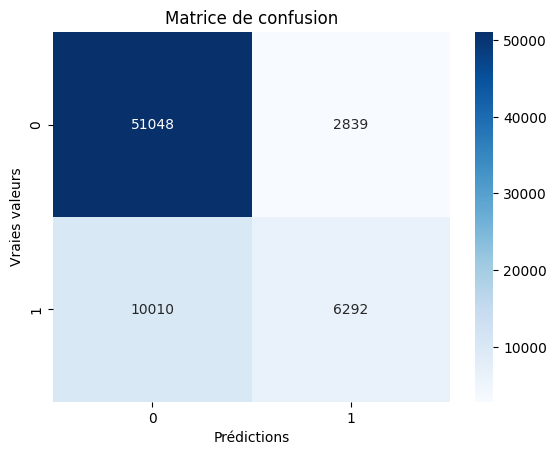

Matrice de confusion : 
[[51048  2839]
 [10010  6292]]


In [14]:
best_lr_model = clf.best_estimator_
y_pred = best_lr_model.predict(X_test)
y_proba = best_lr_model.predict_proba(X_test)[:,1]


print(f'Accuracy : {accuracy_score(y_test, y_pred)}')

print(f'AUC : {roc_auc_score(y_test, y_proba)}')

print(f'\n\nClassification report : \n{classification_report(y_test, y_pred)}')

print(f'Matrice de confusion')


confusion_matrix_graph = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_graph, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()
print(f'Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}')

## Polynomial regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)

score = cross_val_score(model, X_train_poly, y_train, cv=5, n_jobs=-1)
print(f'Score des validations croisées {score}')
print(f'Score moyen : {score.mean()}')
df_resultats['polynomial_features'] = score

Score des validations croisées [0.70516824 0.70095786 0.70687719 0.70378947 0.70740351]
Score moyen : 0.7048392552554328


In [ ]:
clf = GridSearchCV(cv=5, estimator=LogisticRegression(), param_grid={'max_iter' :[100,200,500], 'C' : [0.001, 0.01, 0.1, 1, 10]},scoring='roc_auc', verbose=1, n_jobs=-1)
clf.fit(X_train_poly, y_train)

print(f'Meilleurs paramètres : {clf.best_params_}')
print(f'Meilleur score AUC : {clf.best_score_}')
print(f'Meilleur estimateur : {clf.best_estimator_}')

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Meilleurs paramètres : {'C': 1, 'max_iter': 500}
Meilleur score AUC : 0.6851804028636301
Meilleur estimateur : LogisticRegression(C=1, max_iter=500)


Accuracy : 0.7932582028522988
AUC : 0.6838506477942022


Classification report : 
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     53887
           1       0.68      0.21      0.32     16302

    accuracy                           0.79     70189
   macro avg       0.74      0.59      0.60     70189
weighted avg       0.77      0.79      0.75     70189

Matrice de confusion : 
[[52242  1645]
 [12866  3436]]
Matrice de confusion


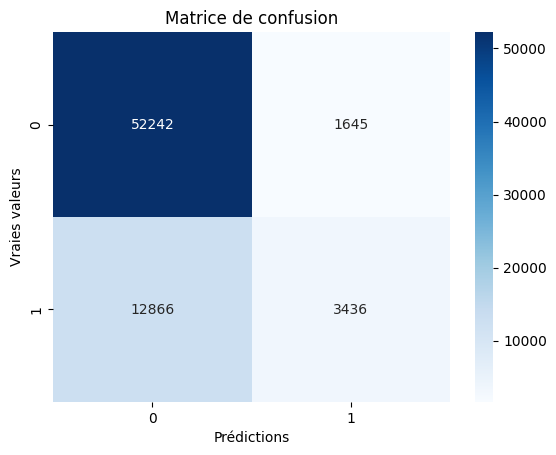

In [ ]:
model = clf.best_estimator_

X_test_poly = poly.transform(X_test)

y_pred = model.predict(X_test_poly)
y_proba = model.predict_proba(X_test_poly)[:,1]


print(f'Accuracy : {accuracy_score(y_test, y_pred)}')
print(f'AUC : {roc_auc_score(y_test, y_proba)}')
print(f'\n\nClassification report : \n{classification_report(y_test, y_pred)}')
print(f'Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}')

print(f'Matrice de confusion')
confusion_matrix_graph = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_graph, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()

# print(f'Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}')

## Random Forest regression

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced', n_jobs=-1)
score = cross_val_score(model, X, y, cv=5)

print(f'Score des validations croisées {score}')
print(f'Score moyen : {score.mean()}')

df_resultats['random_forest_score'] = score

Score des validations croisées [0.23293919 0.82693121 0.82584983 0.82695472 0.28315859]
Score moyen : 0.5991667077004785


In [10]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    }

clf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
# clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
clf.fit(X, y)
print(f'Meilleurs paramètres : {clf.best_params_}')
print(f'Meilleur score AUC : {clf.best_score_}')
print(f'Meilleur estimateur : {clf.best_estimator_}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs paramètres : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 500}
Meilleur score AUC : 0.6981914734825724
Meilleur estimateur : RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, n_estimators=500, random_state=42)


Accuracy : 0.8260838592941914
AUC : 0.6947597397505734


Classification report : 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     53887
           1       0.69      0.45      0.55     16302

    accuracy                           0.83     70189
   macro avg       0.77      0.69      0.72     70189
weighted avg       0.81      0.83      0.81     70189

Matrice de confusion : 
[[50654  3233]
 [ 8974  7328]]
Matrice de confusion


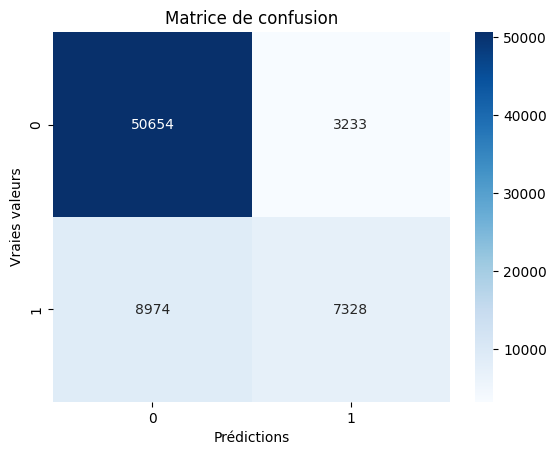

In [12]:
model = clf.best_estimator_

y_pred = model.predict(X_test)

print(f'Accuracy : {accuracy_score(y_test, y_pred)}')
print(f'AUC : {roc_auc_score(y_test, y_pred)}')
print(f'\n\nClassification report : \n{classification_report(y_test, y_pred)}')
print(f'Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}')

print(f'Matrice de confusion')
confusion_matrix_graph = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_graph, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = KNeighborsClassifier(n_jobs=-1)

score = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Score des validations croisées {score}')
print(f'Score moyen : {score.mean()}')

df_resultats['knn'] = score

Score des validations croisées [0.80091927 0.80232273 0.80263158 0.80122807 0.80438596]
Score moyen : 0.8022975211088316


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': range(5, 51, 5),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'] 
}

clf = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

print(f'Meilleurs paramètres : {clf.best_params_}')
print(f'Meilleur score AUC : {clf.best_score_}')
print(f'Meilleur estimateur : {clf.best_estimator_}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Meilleurs paramètres : {'knn__metric': 'euclidean', 'knn__n_neighbors': 25, 'knn__weights': 'uniform'}
Meilleur score AUC : 0.6962005054458045
Meilleur estimateur : Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=25))])


Accuracy : 0.7676559004972289
AUC : 0.5033923548861728


Classification report : 
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     53887
           1       0.38      0.00      0.00     16302

    accuracy                           0.77     70189
   macro avg       0.57      0.50      0.43     70189
weighted avg       0.68      0.77      0.67     70189

Matrice de confusion : 
[[53872    15]
 [16293     9]]
Matrice de confusion


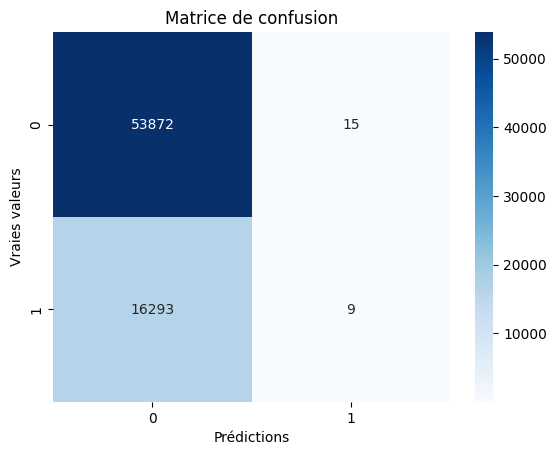

In [29]:
model = clf.best_estimator_

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(f'Accuracy : {accuracy_score(y_test, y_pred)}')
print(f'AUC : {roc_auc_score(y_test, y_proba)}')
print(f'\n\nClassification report : \n{classification_report(y_test, y_pred)}')
print(f'Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}')

print(f'Matrice de confusion')
confusion_matrix_graph = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_graph, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()

# print(f'Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}')

## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

score = cross_val_score(model, X, y, cv=5)
print(f'Score des validations croisées {score}')
print(f'Score moyen : {score.mean()}')

df_resultats['decision_tree'] = score

Score des validations croisées [0.23270411 0.79270299 0.70760261 0.70849593 0.23270958]
Score moyen : 0.534843045257855


In [71]:
clf = GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), param_grid={'max_depth' :[1,2,3,4,5,6,7,8,9,10], 'criterion' : ['gini', 'entropy']},scoring='roc_auc', verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

print(f'Meilleurs paramètres : {clf.best_params_}')
print(f'Meilleur score AUC : {clf.best_score_}')
print(f'Meilleur estimateur : {clf.best_estimator_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres : {'criterion': 'entropy', 'max_depth': 4}
Meilleur score AUC : 0.6995812391350835
Meilleur estimateur : DecisionTreeClassifier(criterion='entropy', max_depth=4)


Accuracy : 0.8260838592941914
AUC : 0.6947597397505734


Classification report : 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     53887
           1       0.69      0.45      0.55     16302

    accuracy                           0.83     70189
   macro avg       0.77      0.69      0.72     70189
weighted avg       0.81      0.83      0.81     70189

Matrice de confusion : 
[[50654  3233]
 [ 8974  7328]]
Matrice de confusion


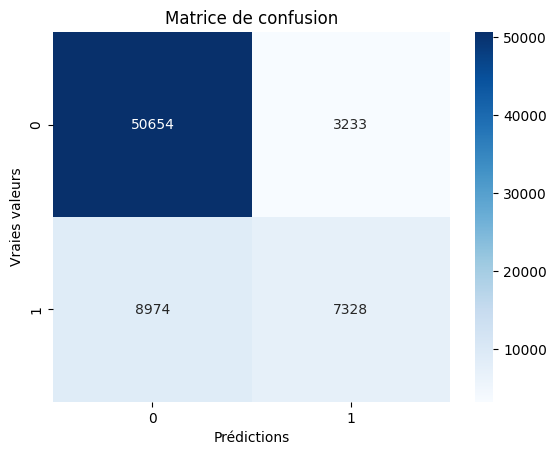

In [73]:
model = clf.best_estimator_

y_pred = model.predict(X_test)

print(f'Accuracy : {accuracy_score(y_test, y_pred)}')
print(f'AUC : {roc_auc_score(y_test, y_pred)}')
print(f'\n\nClassification report : \n{classification_report(y_test, y_pred)}')
print(f'Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}')

print(f'Matrice de confusion')

confusion_matrix_graph = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix_graph, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()